In [1]:
using Pkg; Pkg.activate(".")

In [3]:
g = 9.81

Lx = 100
nx = 25
dx = Lx/nx
x_full = LinRange(0, Lx, nx+1)
x = x_full[1:nx];

In [4]:
function partial_x!(dfdx, f, dx, nx)
    dfdx[1] = 1/(dx) * (f[1] - f[nx])
    for i in 2:nx
        dfdx[i] = 1/(dx) * (f[i] - f[i-1])
    end
end

function adv_x_Euler!(adv, dfdx, f, a, dx, nx)
    partial_x!(dfdx, f, dx, nx)
    @. adv = a * dfdx
end

adv_x_Euler! (generic function with 1 method)

In [9]:
#Initialising variables

phi_old = sin.(2*π*x_full/(Lx))
phi_old = phi_old[1:nx]
phi_new = zeros(nx)
adv = zeros(nx)
dfdx = zeros(nx)

a = 1 #Speed of advection

#Time variables
t_start = 0
t_end = 100
dt = 1

a = 1

#True solution
phi_true = sin.(2*π*x_full/(Lx))[1:nx]

#Needed for making animations
n_steps = Int(t_end/dt)
phi_data = zeros(nx, n_steps + 1)
phi_true_data = zeros(nx, n_steps + 1)

#Advecting the variable for fixed number of time steps

count = 1

for t in t_start:dt:t_end
    adv = adv_x_Euler!(adv, dfdx, phi_old, a, dx, nx)
    phi_new = phi_old - dt*adv
    @. phi_true = sin(2*π*(x - a*(t))/Lx)
    phi_old = phi_new
    phi_data[:, count] = phi_old
    phi_true_data[:, count] = phi_true
    count = count+1
end

┌ Info: Saved animation to 
│   fn = /Users/dhruvbhagtani/Desktop/PhD/Codes/julia_package/ToyModel.jl/tutorial_anim_fps30.gif
└ @ Plots /Users/dhruvbhagtani/.julia/packages/Plots/XCJgc/src/animation.jl:104


Plots.AnimatedGif("/Users/dhruvbhagtani/Desktop/PhD/Codes/julia_package/ToyModel.jl/tutorial_anim_fps30.gif")
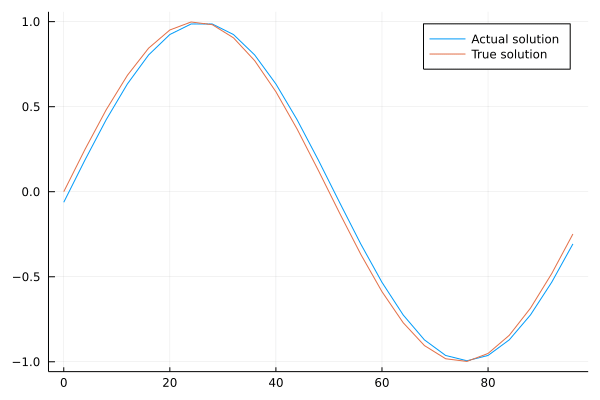

In [11]:
using Plots
anim = @animate for i = 1:n_steps
    plot(x, phi_data[:, i], label = "Actual solution")
    plot!(x, phi_true_data[:, i], label = "True solution")
end
 
gif(anim, "tutorial_anim_fps30.gif", fps = 8)

In [8]:
using BenchmarkTools

In [ ]:
function adv_x_Euler(f1, a, dx)
    nx, = size(phi_true)
    f2 = zeros(nx)
    f2 .= a.*partial_x(f1, dx)
    return f2
end;

In [14]:
@btime partial_x(phi_old, dx);

  5.196 μs (268 allocations: 4.86 KiB)


In [27]:
@btime adv_x_Euler(phi_old, a, dx);

  5.886 μs (273 allocations: 5.25 KiB)


In [25]:
dphidx = similar(phi_old);

In [18]:
length(phi_old)

25

In [23]:
function partial_x!(dfdx, f, dx, nx)
    dfdx[1] = 1/(dx) * (f[1] - f[nx])
    for i in 2:nx
        dfdx[i] = 1/(dx) * (f[i] - f[i-1])
    end
end

partial_x! (generic function with 2 methods)

In [24]:
@btime partial_x!(dphidx, phi_old, dx, nx);

  42.879 ns (0 allocations: 0 bytes)


In [35]:
adv = similar(phi_old);

In [32]:
function adv_x_Euler(dfdx, f, a, dx, nx)
    partial_x!(dfdx, f, dx, nx)
    return a*dfdx
end

adv_x_Euler (generic function with 2 methods)

In [45]:
function adv_x_Euler!(adv, dfdx, f, a, dx, nx)
    partial_x!(dfdx, f, dx, nx)
    @. adv = a * dfdx
end

adv_x_Euler! (generic function with 2 methods)

In [31]:
@btime adv_x_Euler(dphidx, phi_old, a, dx, nx);

  87.023 ns (1 allocation: 288 bytes)


In [44]:
@btime adv_x_Euler!(adv, dphidx, phi_old, a, dx, nx);

  52.766 ns (0 allocations: 0 bytes)


In [95]:
#Initialising variables

phi_old = sin.(2*π*x/(Lx))
phi_old = phi_old[1:nx]
phi_new = zeros(nx)
dphidx = similar(phi_new)
adv = similar(phi_new)
a = 1 #Speed of advection

#Time variables
t_start = 0
t_end = 100
dt = 1

a = 1

#True solution
phi_true = sin.(2*π*x/(Lx))[1:nx]

#Needed for making animations
n_steps = Int(t_end/dt)
phi_data = zeros(nx, n_steps + 1)
phi_true_data = zeros(nx, n_steps + 1)

#Advecting the variable for fixed number of time steps

count = 1

# startwalltime = time()

function stepforward(phi_old, t_start, t_end)
    for t in t_start:dt:t_end
        adv_x_Euler!(adv, dphidx, phi_old, a*dt, dx, nx)
        phi_old = phi_old - adv
        #@. phi_true = sin(2*π*(x_trunc - a*(t))/Lx)
        #phi_data[:, count] = phi_old
        #phi_true_data[:, count] = phi_true
#         count = count+1
    end
    return phi_old
end


stepforward (generic function with 1 method)

In [96]:
@btime stepforward(phi_old, t_start, t_end);

  60.640 μs (304 allocations: 9.50 KiB)


In [97]:
Pkg.add("OffsetArrays")

In [98]:
Pkg.add("CircularArrays")

In [99]:
using OffsetArrays, CircularArrays

In [100]:
x

26-element LinRange{Float64}:
 0.0,4.0,8.0,12.0,16.0,20.0,24.0,28.0,…,76.0,80.0,84.0,88.0,92.0,96.0,100.0

In [120]:
f = OffsetArray(Array(1:8), -3)


8-element OffsetArray(::Vector{Int64}, -2:5) with eltype Int64 with indices -2:5:
 1
 2
 3
 4
 5
 6
 7
 8

In [121]:
f[1]

4

In [122]:
f = CircularArray(Array(1:8))



8-element CircularVector(::Vector{Int64}):
 1
 2
 3
 4
 5
 6
 7
 8

In [124]:
f[9]

1

In [145]:
struct Grid
    nx::Int
    dx::Float64
    Lx::Float64
     x::Vector
end

function Grid(nx, Lx)
    dx = Lx/nx
    x = LinRange(0, Lx, nx+1)
    
    return Grid(nx, dx, Lx, x)
end

grid1 = Grid(nx, dx, Lx, x)
grid2 = Grid(nx, Lx)

Grid(25, 4.0, 100.0, [0.0, 4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.000000000000004, 32.0, 36.0  …  64.0, 68.0, 72.0, 76.0, 80.0, 84.0, 88.0, 92.0, 96.0, 100.0])

In [147]:
function derivative!(dfdx, f, grid)
    nx, dx = grid.nx, grid.dx
    for j in 1:nx
        dfdx[j] = (f[j+1] - f[j])/dx
    end
end

Grid(25, 4.0, 100.0, [0.0, 4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.000000000000004, 32.0, 36.0  …  64.0, 68.0, 72.0, 76.0, 80.0, 84.0, 88.0, 92.0, 96.0, 100.0])

In [138]:
nx

25

In [139]:
Lx

100